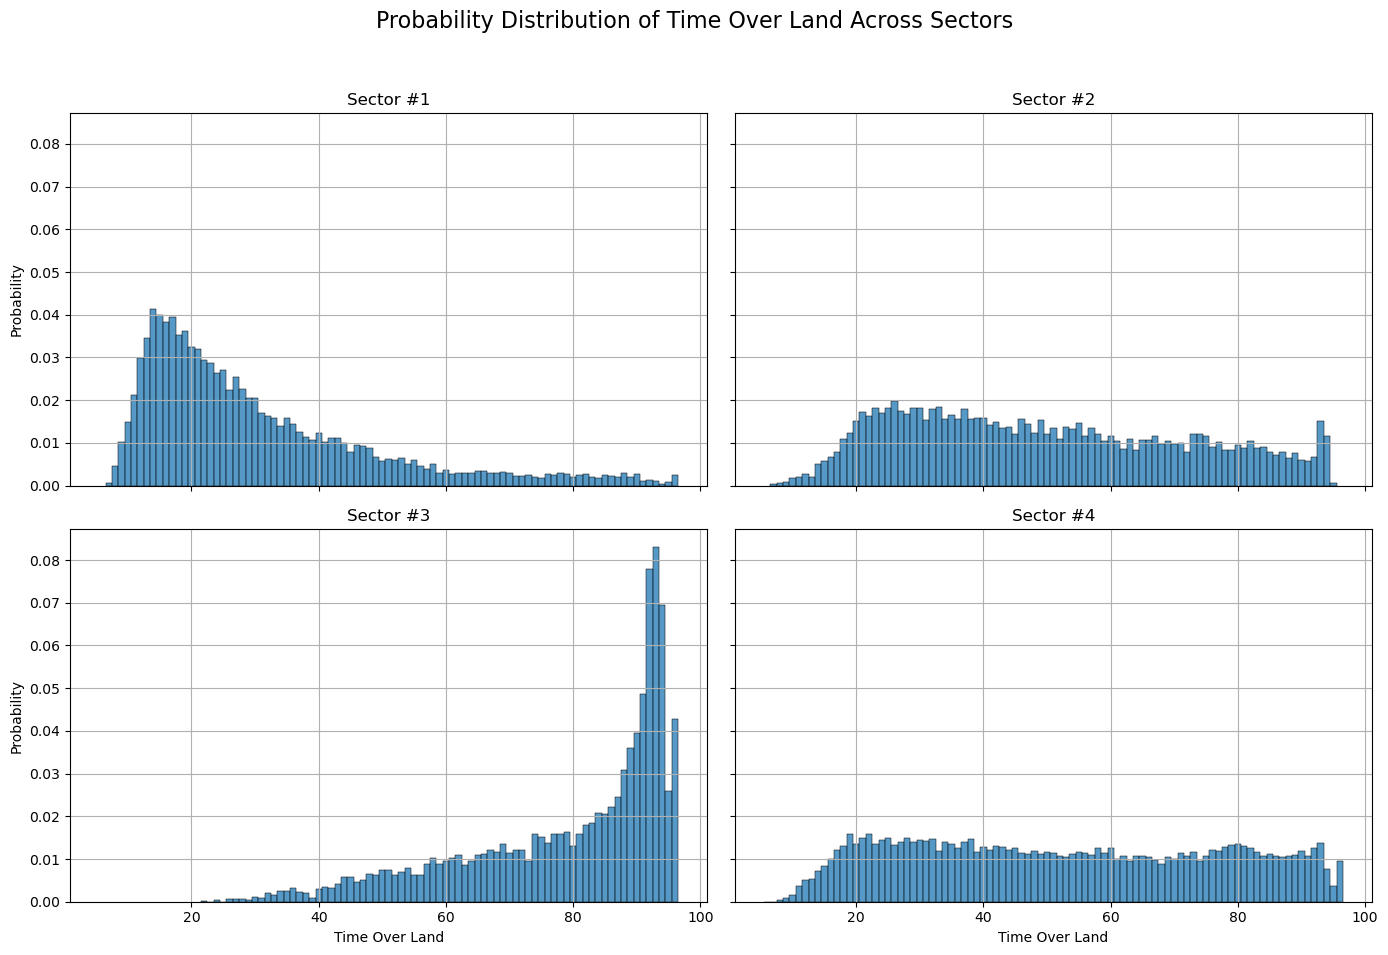

In [1]:
# 7th September (Probability distribution Function) (Improved plot, Pauli)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def load_data(file_path):
    """
    Loads the Excel file into a pandas DataFrame.
    """
    return pd.read_excel(file_path)

def plot_probability_distributions(data):
    """
    Plots the probability distribution of Time Over Land for each sector.
    """
    # Set up a figure to hold all subplots in a 2x2 grid
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10), sharex=True, sharey=True)
    fig.suptitle('Probability Distribution of Time Over Land Across Sectors', fontsize=16)
    
    # Iterate through each sector and plot
    for i, ax in enumerate(axes.flatten(), 1):
        sector_data = data[data['Sector'] == i]
        sns.histplot(sector_data['TimeOverLand'], kde=False, stat="probability", discrete=True, binwidth=1, ax=ax)
        ax.set_title(f'Sector #{i}')
        ax.set_xlabel('Time Over Land')
        ax.set_ylabel('Probability')
        ax.grid(True)

    # Adjust layout for better spacing
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

if __name__ == '__main__':
    # Specify the path to your Excel file
    file_path = '/Users/touqeergill/Desktop/PSD VS TOL (Tunved).xlsx'
    data = load_data(file_path)
    plot_probability_distributions(data)

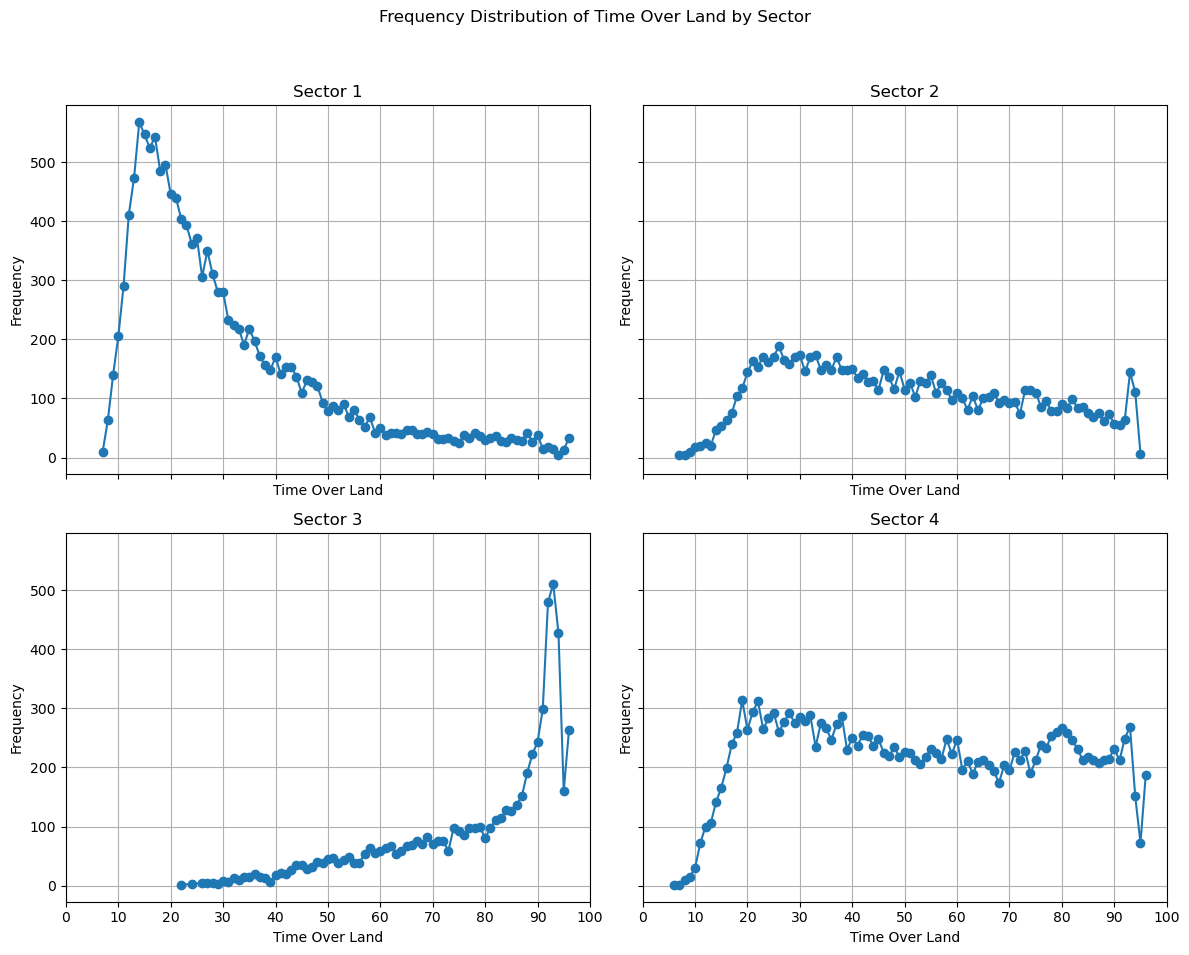

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data from the Excel file
file_path = '/Users/touqeergill/Desktop/PSD VS TOL (Tunved).xlsx'
data = pd.read_excel(file_path)

# Filter out any rows where the 'Sector' might be NaN or non-numeric
data = data.dropna(subset=['Sector'])  # Drop rows where 'Sector' is NaN
data['Sector'] = data['Sector'].apply(pd.to_numeric, errors='coerce')  # Convert 'Sector' to numeric, forcing NaN on errors
data = data.dropna(subset=['Sector'])  # Drop rows where 'Sector' conversion to numeric failed
data['Sector'] = data['Sector'].astype(int)  # Convert 'Sector' to integer

# Get the unique sectors and limit to the first four numeric sectors if more are present
unique_sectors = sorted(data['Sector'].unique())[:4]

# Set up the plot area
n_rows, n_cols = 2, 2  # Grid layout for four plots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 10), sharey=True, sharex=True)

# Set the x-axis range and ticks
x_min = 0
x_max = 100
x_ticks = range(x_min, x_max + 1, 10)

# Process each of the first four sectors and plot
for i, sector in enumerate(unique_sectors):
    sector_data = data[data['Sector'] == sector]
    tol_frequency_sector = sector_data['TimeOverLand'].value_counts().sort_index()

    # Determine the appropriate subplot index
    ax = axes[i // n_cols, i % n_cols]
    ax.plot(tol_frequency_sector.index, tol_frequency_sector.values, marker='o', linestyle='-')
    ax.set_title(f'Sector {sector}')
    ax.set_xlabel('Time Over Land')
    ax.set_xlim([x_min, x_max])
    ax.set_xticks(x_ticks)
    ax.set_ylabel('Frequency')
    ax.grid(True)

plt.suptitle('Frequency Distribution of Time Over Land by Sector')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the layout to make room for the title
plt.show()

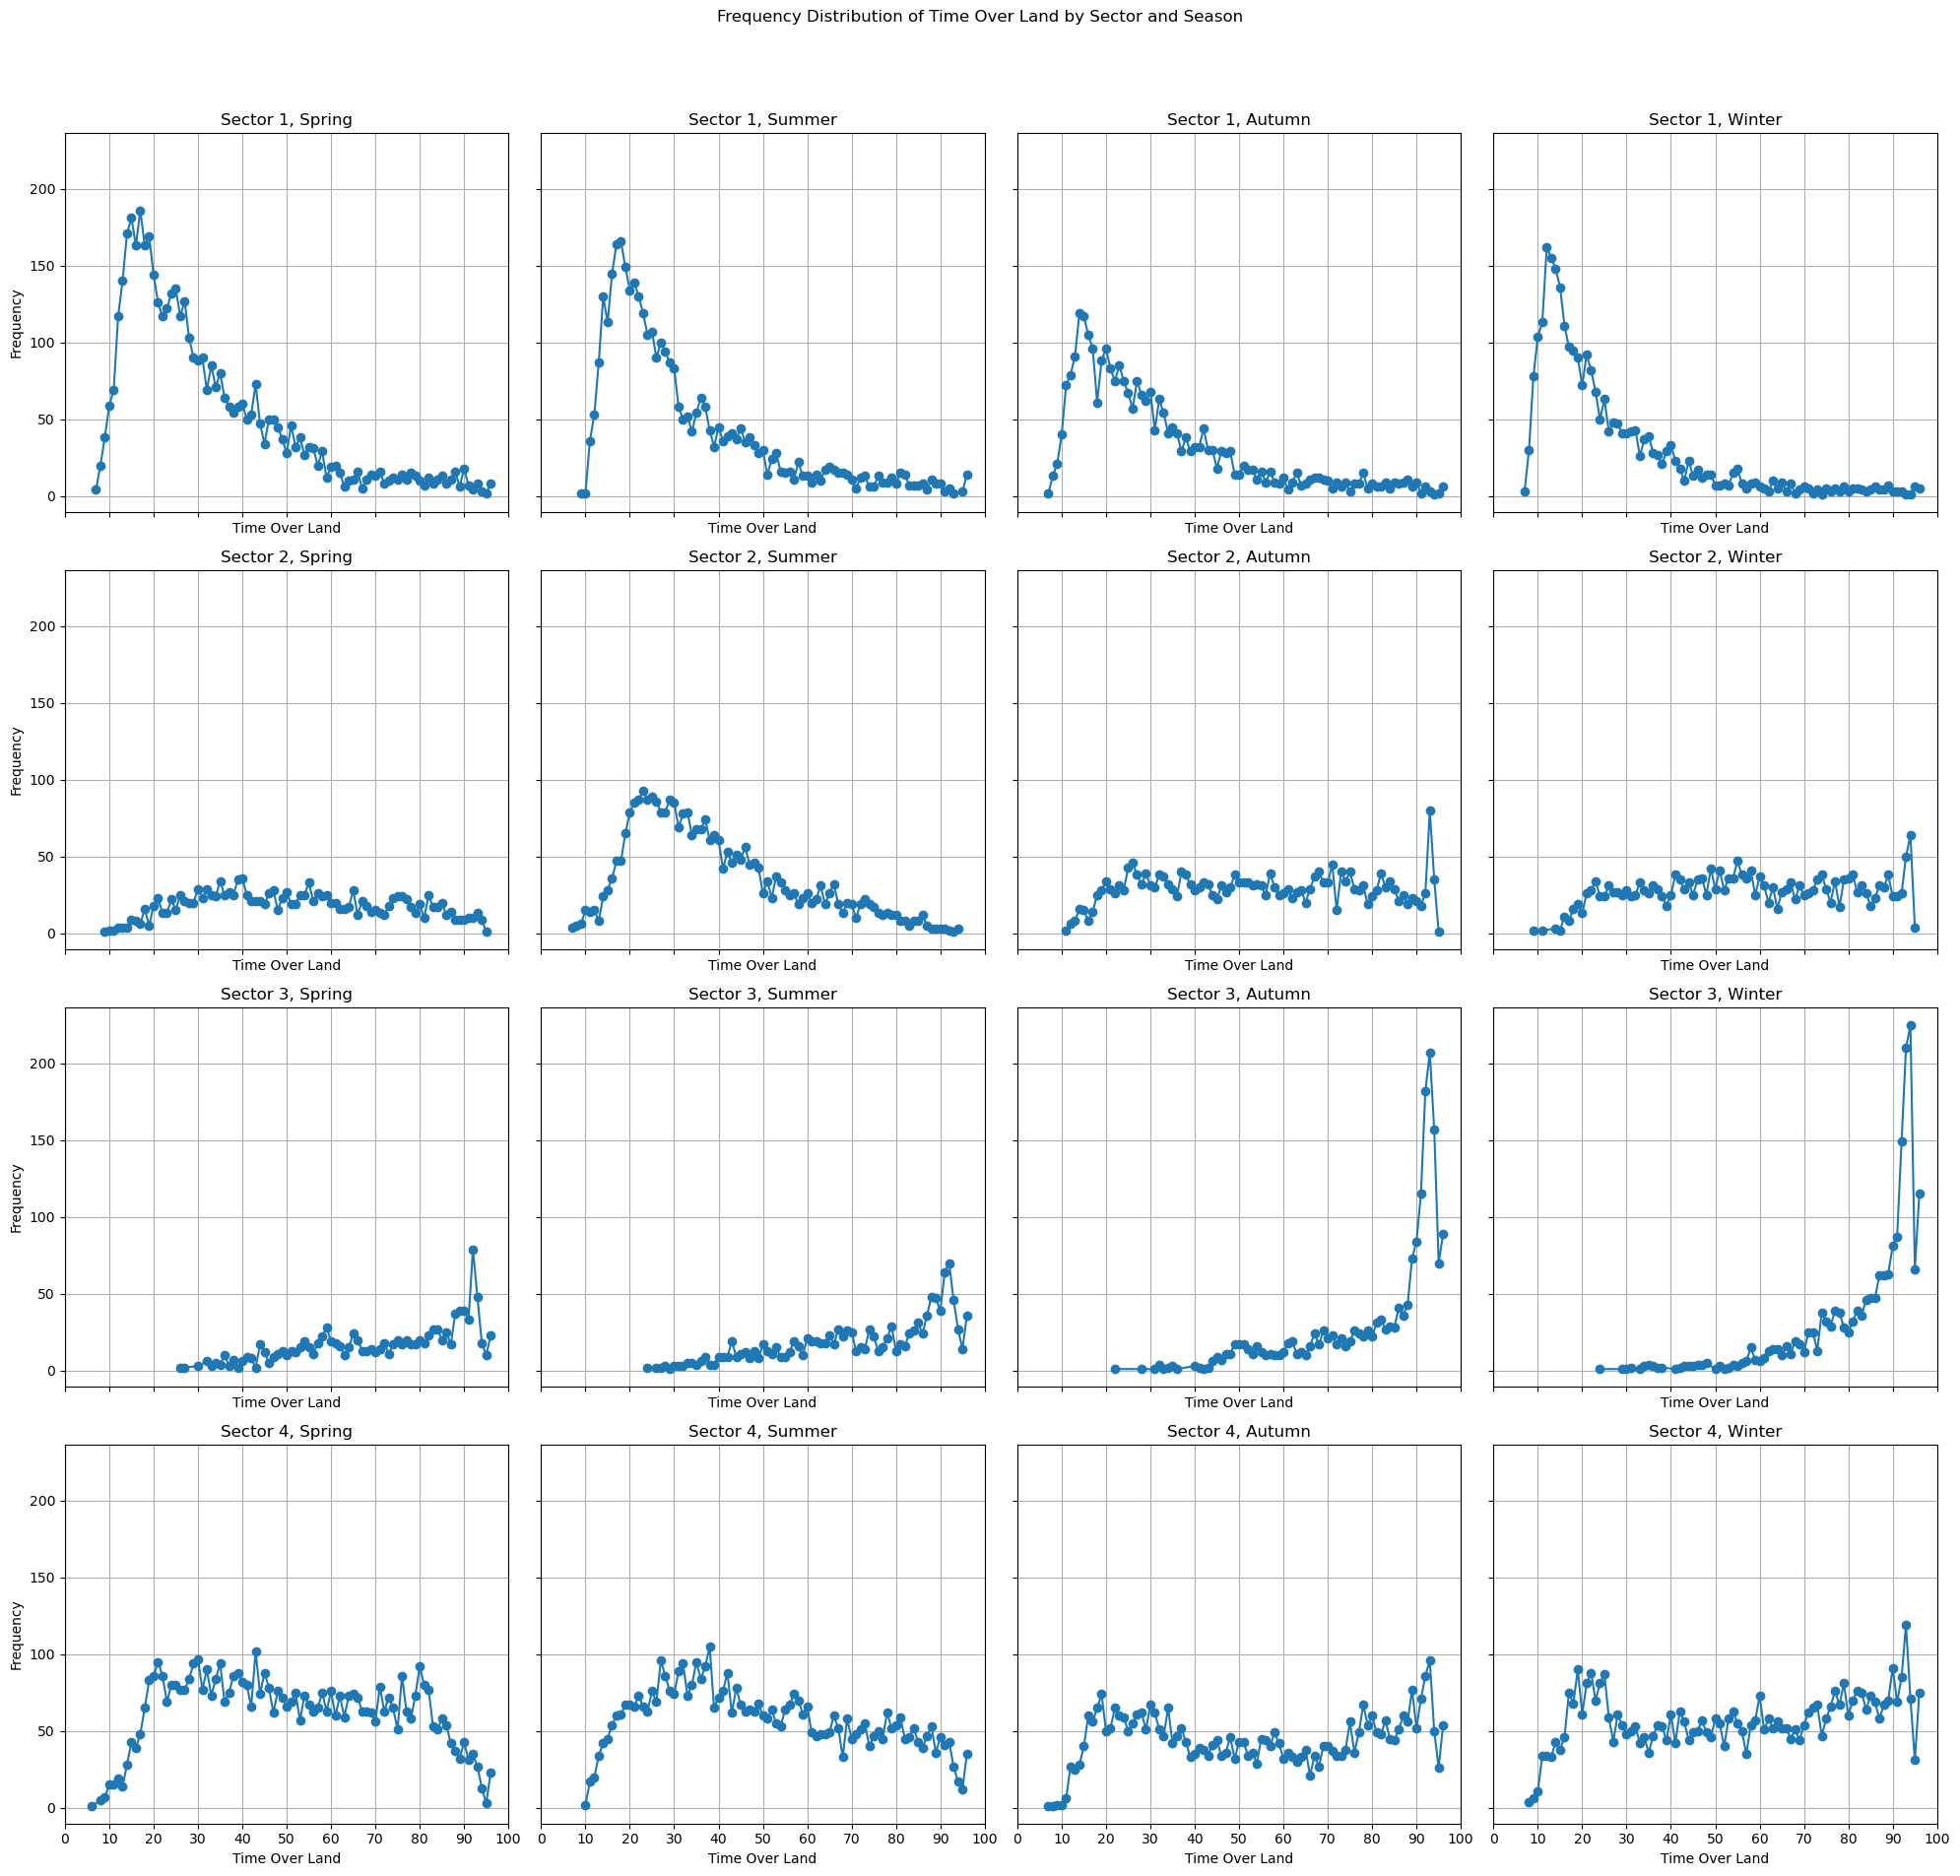

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data from the Excel file
file_path = '/Users/touqeergill/Desktop/PSD VS TOL (Tunved).xlsx'
data = pd.read_excel(file_path)

# Define the season by month
def season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Winter'

# Apply the season function to extract the season from the 'Date and Time' column
data['Season'] = data['Date and Time'].dt.month.apply(season)

# Filter out any rows where the 'Sector' might be NaN or non-numeric
data = data.dropna(subset=['Sector'])
data['Sector'] = data['Sector'].apply(pd.to_numeric, errors='coerce')
data = data.dropna(subset=['Sector'])
data['Sector'] = data['Sector'].astype(int)

# Get the unique sectors and limit to the first four numeric sectors
unique_sectors = sorted(data['Sector'].unique())[:4]
seasons = ['Spring', 'Summer', 'Autumn', 'Winter']

# Set up the plot area
fig, axes = plt.subplots(4, 4, figsize=(20, 20), sharey=True, sharex=True)

# Set the x-axis range and ticks
x_min = 0
x_max = 100
x_ticks = range(x_min, x_max + 1, 10)

# Process each sector-season combination and plot
for i, sector in enumerate(unique_sectors):
    for j, season_name in enumerate(seasons):
        ax = axes[i, j]
        sector_season_data = data[(data['Sector'] == sector) & (data['Season'] == season_name)]
        tol_frequency = sector_season_data['TimeOverLand'].value_counts().sort_index()
        
        ax.plot(tol_frequency.index, tol_frequency.values, marker='o', linestyle='-')
        ax.set_title(f'Sector {sector}, {season_name}')
        ax.set_xlabel('Time Over Land')
        ax.set_xlim([x_min, x_max])
        ax.set_xticks(x_ticks)
        if j == 0:
            ax.set_ylabel('Frequency')
        ax.grid(True)

plt.suptitle('Frequency Distribution of Time Over Land by Sector and Season')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the layout to make room for the title
plt.show()

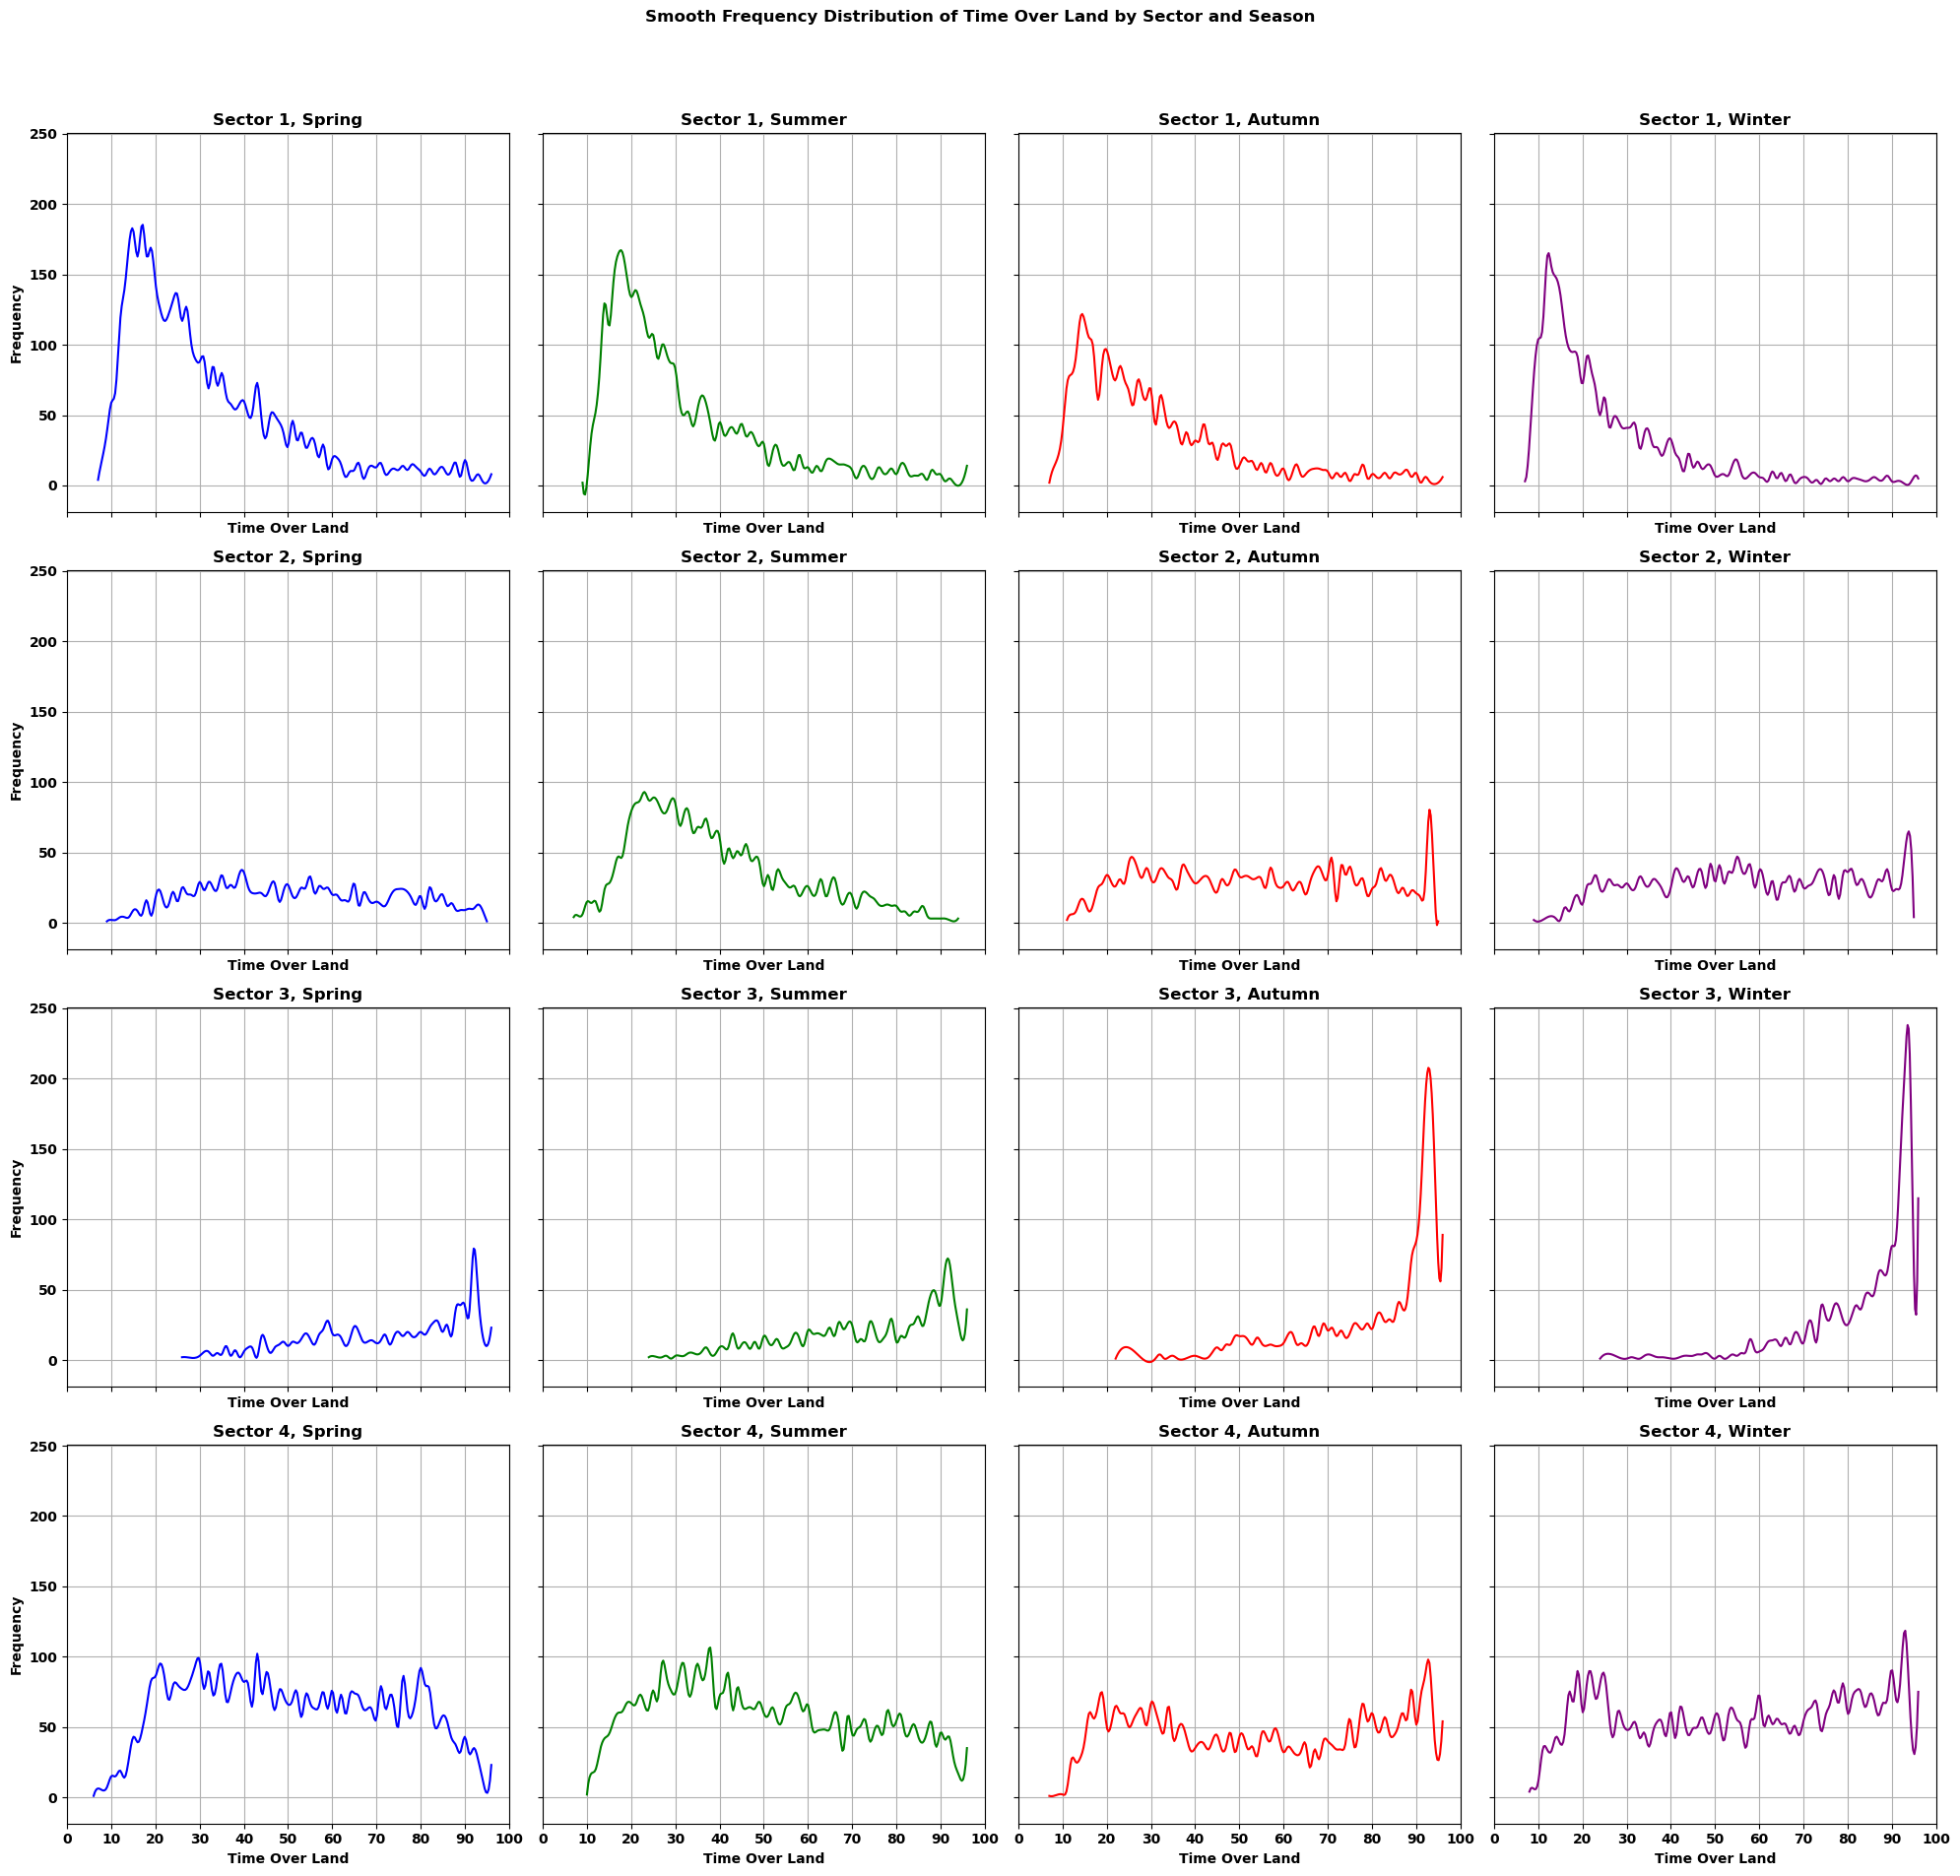

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

# Load the data from the Excel file
file_path = '/Users/touqeergill/Desktop/PSD VS TOL (Tunved).xlsx'
data = pd.read_excel(file_path)

# Define the season by month
def season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Winter'

# Apply the season function to extract the season from the 'Date and Time' column
data['Season'] = data['Date and Time'].dt.month.apply(season)

# Filter out any rows where the 'Sector' might be NaN or non-numeric
data = data.dropna(subset=['Sector'])
data['Sector'] = data['Sector'].apply(pd.to_numeric, errors='coerce')
data = data.dropna(subset=['Sector'])
data['Sector'] = data['Sector'].astype(int)

# Get the unique sectors and limit to the first four numeric sectors
unique_sectors = sorted(data['Sector'].unique())[:4]
seasons = ['Spring', 'Summer', 'Autumn', 'Winter']

# Colors for each season
season_colors = {
    'Spring': 'blue',
    'Summer': 'green',
    'Autumn': 'red',
    'Winter': 'purple'
}

# Set up the plot area
fig, axes = plt.subplots(4, 4, figsize=(20, 20), sharey=True, sharex=True)

# Set the x-axis range and ticks
x_min = 0
x_max = 100
x_ticks = range(x_min, x_max + 1, 10)

# Process each sector-season combination and plot
for i, sector in enumerate(unique_sectors):
    for j, season_name in enumerate(seasons):
        ax = axes[i, j]
        sector_season_data = data[(data['Sector'] == sector) & (data['Season'] == season_name)]
        tol_frequency = sector_season_data['TimeOverLand'].value_counts().sort_index()
        
        # Spline interpolation to smooth the plot
        if len(tol_frequency) > 1:  # Ensure there are enough points to interpolate
            x_new = np.linspace(tol_frequency.index.min(), tol_frequency.index.max(), 300)
            spl = make_interp_spline(tol_frequency.index, tol_frequency.values, k=3)  # Cubic spline
            y_smooth = spl(x_new)
            ax.plot(x_new, y_smooth, linestyle='-', color=season_colors[season_name])
        else:
            ax.plot(tol_frequency.index, tol_frequency.values, marker='o', linestyle='-', color=season_colors[season_name])
        
        ax.set_title(f'Sector {sector}, {season_name}', fontweight='bold')
        ax.set_xlabel('Time Over Land', fontweight='bold')
        ax.set_xlim([x_min, x_max])
        ax.set_xticks(x_ticks)
        if j == 0:
            ax.set_ylabel('Frequency', fontweight='bold')
        ax.grid(True)
        
        # Make x-axis and y-axis tick labels bold
        for label in ax.get_xticklabels() + ax.get_yticklabels():
            label.set_fontweight('bold')

plt.suptitle('Smooth Frequency Distribution of Time Over Land by Sector and Season', fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the layout to make room for the title
plt.show()

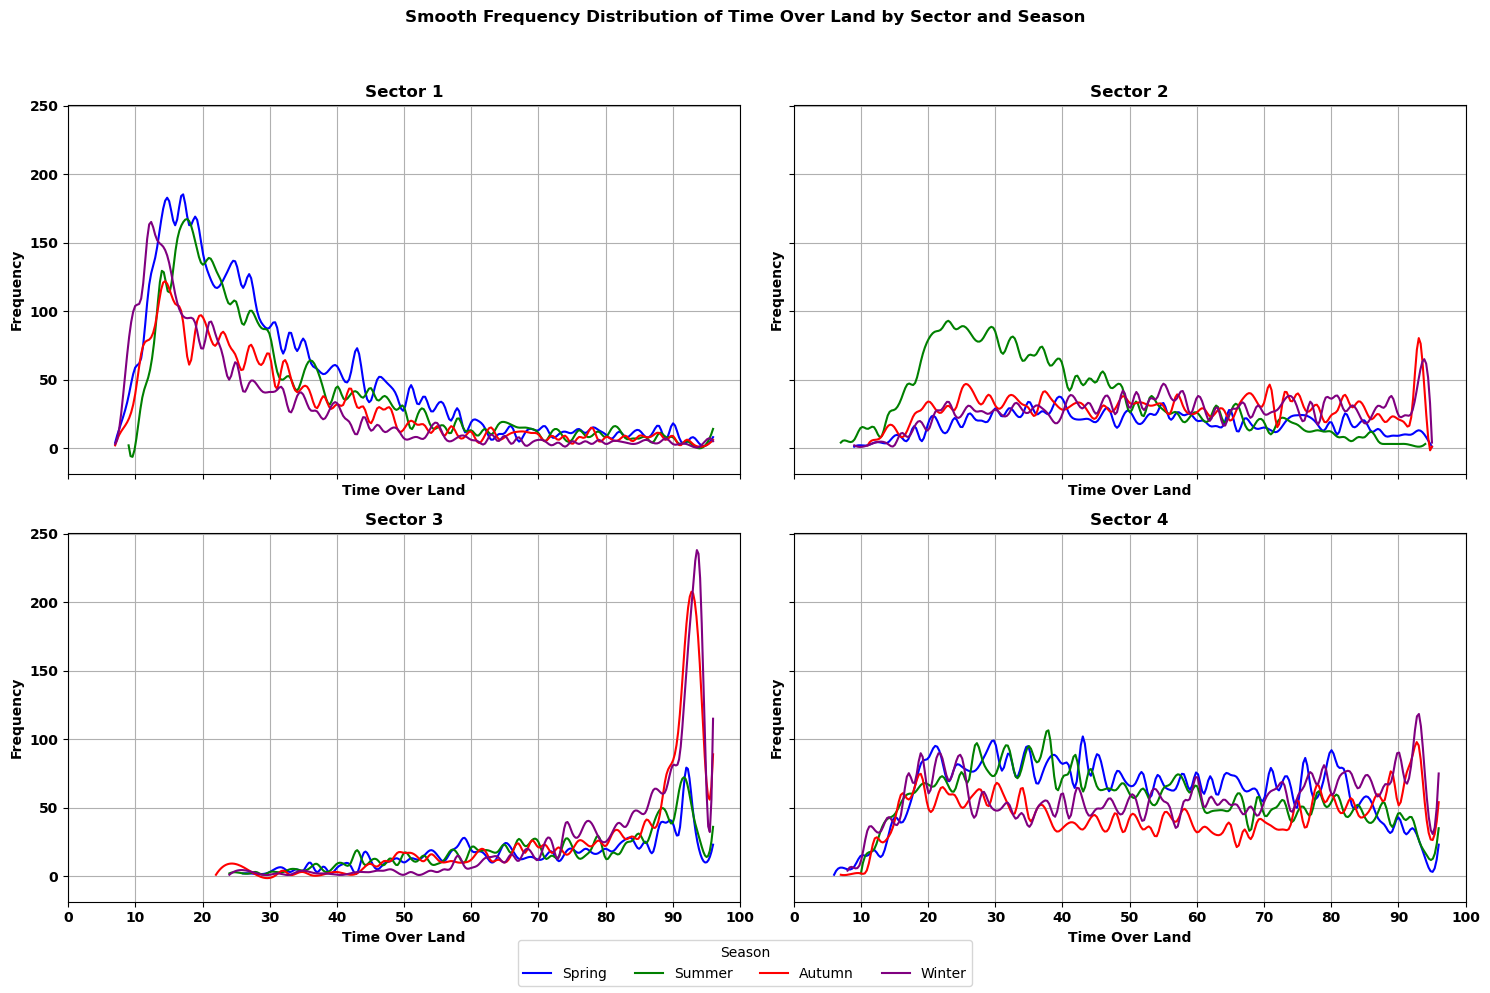

In [21]:
# 7th September (Probability distribution Function) (Improved plot, Pauli)


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

# Load the data from the Excel file
file_path = '/Users/touqeergill/Desktop/PSD VS TOL (Tunved).xlsx'
data = pd.read_excel(file_path)

# Define the season by month
def season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Winter'

# Apply the season function to extract the season from the 'Date and Time' column
data['Season'] = data['Date and Time'].dt.month.apply(season)

# Filter out any rows where the 'Sector' might be NaN or non-numeric
data = data.dropna(subset=['Sector'])
data['Sector'] = data['Sector'].apply(pd.to_numeric, errors='coerce')
data = data.dropna(subset=['Sector'])
data['Sector'] = data['Sector'].astype(int)

# Get the unique sectors and limit to the first four numeric sectors
unique_sectors = sorted(data['Sector'].unique())[:4]
seasons = ['Spring', 'Summer', 'Autumn', 'Winter']

# Colors for each season
season_colors = {
    'Spring': 'blue',
    'Summer': 'green',
    'Autumn': 'red',
    'Winter': 'purple'
}

# Set up the plot area in a 2x2 layout
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharey=True, sharex=True)

# Set the x-axis range and ticks
x_min = 0
x_max = 100
x_ticks = range(x_min, x_max + 1, 10)

# Process each sector and plot all seasons in one plot
lines = []  # To store the line objects for the legend
labels = []  # To store the labels for the legend
for i, sector in enumerate(unique_sectors):
    ax = axes[i // 2, i % 2]  # Determine the correct subplot
    for season_name in seasons:
        sector_season_data = data[(data['Sector'] == sector) & (data['Season'] == season_name)]
        tol_frequency = sector_season_data['TimeOverLand'].value_counts().sort_index()
        
        # Spline interpolation to smooth the plot
        if len(tol_frequency) > 1:  # Ensure there are enough points to interpolate
            x_new = np.linspace(tol_frequency.index.min(), tol_frequency.index.max(), 300)
            spl = make_interp_spline(tol_frequency.index, tol_frequency.values, k=3)  # Cubic spline
            y_smooth = spl(x_new)
            line, = ax.plot(x_new, y_smooth, linestyle='-', color=season_colors[season_name], label=season_name)
            if i == 0:  # Only add to legend list once
                lines.append(line)
                labels.append(season_name)
        else:
            line, = ax.plot(tol_frequency.index, tol_frequency.values, marker='o', linestyle='-', color=season_colors[season_name], label=season_name)
            if i == 0:  # Only add to legend list once
                lines.append(line)
                labels.append(season_name)

    ax.set_title(f'Sector {sector}', fontweight='bold')
    ax.set_xlabel('Time Over Land', fontweight='bold')
    ax.set_xlim([x_min, x_max])
    ax.set_xticks(x_ticks)
    ax.set_ylabel('Frequency', fontweight='bold')
    ax.grid(True)
    
    # Make x-axis and y-axis tick labels bold
    for label in ax.get_xticklabels():
        label.set_fontweight('bold')
    for label in ax.get_yticklabels():
        label.set_fontweight('bold')

# Add a single legend
fig.legend(lines, labels, loc='lower center', ncol=4, title='Season')

plt.suptitle('Smooth Frequency Distribution of Time Over Land by Sector and Season', fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the layout to make room for the title
plt.show()